In [1]:
# 基本套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# 資料前處理
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 演算法
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

# 評估指標
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# 載入資料集
df = pd.read_csv('../Titanic_demo_1.csv')
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,no
1,1,female,38.0,1,0,71.2833,C,yes
2,3,female,26.0,0,0,7.9250,S,yes
3,1,female,35.0,1,0,53.1000,S,yes
4,3,male,35.0,0,0,8.0500,S,no
...,...,...,...,...,...,...,...,...
1304,3,male,NaN,0,0,8.0500,S,yes
1305,1,female,39.0,0,0,108.9000,C,no
1306,3,male,NaN,0,0,7.2500,S,no
1307,3,male,NaN,0,0,8.0500,S,no


# 1. 資料前處理

In [3]:
# 1.1 直接刪除遺失值 (missing value)
new_df=df.dropna(axis=0, how='any')
new_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,no
1,1,female,38.0,1,0,71.2833,C,yes
2,3,female,26.0,0,0,7.9250,S,yes
3,1,female,35.0,1,0,53.1000,S,yes
4,3,male,35.0,0,0,8.0500,S,no
...,...,...,...,...,...,...,...,...
1298,1,male,50.0,1,1,211.5000,C,yes
1300,3,female,3.0,1,1,13.7750,S,yes
1302,1,female,37.0,1,0,90.0000,Q,yes
1303,3,female,28.0,0,0,7.7750,S,no


In [4]:
# 1.2 前處理後的資料描述性統計
new_df[['Age','SibSp','Parch','Fare']].describe()

,Age,SibSp,Parch,Fare
count,1001.000000,1001.000000,1001.000000,1001.000000
mean,30.147852,0.503497,0.415584,37.305257
std,14.179637,0.893442,0.842091,56.336078
min,1.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,8.050000
50%,28.000000,0.000000,0.000000,15.900000
75%,39.000000,1.000000,1.000000,37.004200
max,80.000000,5.000000,6.000000,512.329200


In [5]:
# 1.2 前處理後的資料描述性統計
print(new_df[['Pclass']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Embarked']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Survived']].value_counts(sort=True))

Pclass
3         468
1         280
2         253
Name: count, dtype: int64
+-----------------------+
Sex   
male      621
female    380
Name: count, dtype: int64
+-----------------------+
Embarked
S           756
C           199
Q            46
Name: count, dtype: int64
+-----------------------+
Survived
no          605
yes         396
Name: count, dtype: int64


In [ ]:
# 1.3 使用 unique 函數檢查類別型資料標籤
print('Pclass',new_df['Pclass'].unique())
print('Sex',new_df['Sex'].unique())
print('Embarked',new_df['Embarked'].unique())
print('Survived',new_df['Survived'].unique())

Pclass [3 1 2]
Sex ['male' 'female']
Embarked ['S' 'C' 'Q']
Survived ['no' 'yes']


In [ ]:
# 1.4 將類別型資料轉換成 one-hot-encoding 編碼
dummied_new_df=pd.get_dummies(new_df,columns=['Pclass','Sex','Embarked','Survived'])
dummied_new_df

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,22.0,1,0,7.2500,False,False,True,False,True,False,False,True,True,False
1,38.0,1,0,71.2833,True,False,False,True,False,True,False,False,False,True
2,26.0,0,0,7.9250,False,False,True,True,False,False,False,True,False,True
3,35.0,1,0,53.1000,True,False,False,True,False,False,False,True,False,True
4,35.0,0,0,8.0500,False,False,True,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,50.0,1,1,211.5000,True,False,False,False,True,True,False,False,False,True
1300,3.0,1,1,13.7750,False,False,True,True,False,False,False,True,False,True
1302,37.0,1,0,90.0000,True,False,False,True,False,False,True,False,False,True
1303,28.0,0,0,7.7750,False,False,True,True,False,False,False,True,True,False


In [ ]:
# 1.5 將處理完的 dataset 另存新檔，方便未來使用
dummied_new_df.to_csv('Titanic_KNN_demo_deleteNA.csv',index=False, header=True)
print('Export complete...')

Export complete...


## 補充: 其他資料前處理手法

刪除所有遺失值並不是唯一的最佳選擇，因此這裡提供另外兩種處理遺失值的方法。
1. 在列中找出特定的資料點 
2. 填補缺失值

In [9]:
# 使用 np.isnan() 函數找尋特定的資料點
# 使用 numpy(row index) 查找缺失值
np.where(np.isnan(df['Fare']))

(array([1043]),)

In [10]:
# 透過行索引呼叫特定資料點
df.loc[1043,:]

Pclass         3
Sex         male
Age          NaN
SibSp          0
Parch          0
Fare         NaN
Embarked       S
Survived     yes
Name: 1043, dtype: object

In [11]:
# 透過行索引刪除 
Tip_df=df.drop([1043])
np.where(np.isnan(Tip_df['Fare']))

(array([], dtype=int64),)

In [12]:
Tip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1308 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1308 non-null   int64  
 1   Sex       1308 non-null   object 
 2   Age       1001 non-null   float64
 3   SibSp     1308 non-null   int64  
 4   Parch     1308 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Embarked  1308 non-null   object 
 7   Survived  1308 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [13]:
# 透過填入缺失值來處理
Tip_df=Tip_df.fillna({'Age':round(Tip_df['Age'].mean(),0)})
Tip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1308 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1308 non-null   int64  
 1   Sex       1308 non-null   object 
 2   Age       1308 non-null   float64
 3   SibSp     1308 non-null   int64  
 4   Parch     1308 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Embarked  1308 non-null   object 
 7   Survived  1308 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


# 3. 使用 minimax 資料縮放技術進行正規化

In [14]:
# 3.1 minimax scaling       將資料尺度轉換到 0~1
MMscaler=MinMaxScaler(feature_range=(0, 1))
scaling=MMscaler.fit_transform(dummied_new_df)
scaled_data=pd.DataFrame(data=scaling)
scaled_data.columns=['Age','SibsSp','Parch','Fare','Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Survived_no','Survived_yes']
scaled_data.head()

,Age,SibsSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,0.265823,0.2,0.0,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.468354,0.2,0.0,0.139136,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.316456,0.0,0.0,0.015469,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.430380,0.2,0.0,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.430380,0.0,0.0,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


# 4. 設定目標變數(Y)和自變數(X)

In [15]:
# 4.1.1 set x (make prediction) without minimax
x=dummied_new_df.drop(['Survived_no','Survived_yes'],axis=1).copy()
x

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,False,False,True,False,True,False,False,True
1,38.0,1,0,71.2833,True,False,False,True,False,True,False,False
2,26.0,0,0,7.9250,False,False,True,True,False,False,False,True
3,35.0,1,0,53.1000,True,False,False,True,False,False,False,True
4,35.0,0,0,8.0500,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,50.0,1,1,211.5000,True,False,False,False,True,True,False,False
1300,3.0,1,1,13.7750,False,False,True,True,False,False,False,True
1302,37.0,1,0,90.0000,True,False,False,True,False,False,True,False
1303,28.0,0,0,7.7750,False,False,True,True,False,False,False,True


In [16]:
# 4.1.2 set y (want to predict) without minimax
y=dummied_new_df['Survived_yes'].copy()
y

0       False
1        True
2        True
3        True
4       False
        ...  
1298     True
1300     True
1302     True
1303    False
1305    False
Name: Survived_yes, Length: 1001, dtype: bool

In [17]:
# 4.2.1 set x (make prediction) with minimax
scaled_x=scaled_data.drop(['Survived_no','Survived_yes'],axis=1).copy()

# 4.2.2 set y (want to predict)
scaled_y=scaled_data['Survived_yes'].copy()
scaled_y=scaled_y.astype(int)

# 5. 分割成訓練集(training set)和測試集(testing set)

In [18]:
# 5.1 prepare dataset without scaling
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [19]:
# 5.2 prepare dataset with scaling
scaled_x_train,scaled_x_test,scaled_y_train,scaled_y_test=train_test_split(scaled_x,scaled_y,test_size=0.2,random_state=4)

In [20]:
print('y_train:',Counter(y_train))
print('------------------------------------')
print('y_test :',Counter(y_test))

y_train: Counter({False: 483, True: 317})
------------------------------------
y_test : Counter({False: 122, True: 79})


In [21]:
print('scaled_y_train:',Counter(scaled_y_train))
print('------------------------------------')
print('scaled_y_test :',Counter(scaled_y_test))

scaled_y_train: Counter({0: 483, 1: 317})
------------------------------------
scaled_y_test : Counter({0: 122, 1: 79})


# 6. 模型訓練

## 6.1 使用未經正規化的資料訓練模型

In [22]:
# 6.1.1 使用 KNN 函數擬合模型
"""
Note: 可以設定不同的距離計算演算法 
'euclidean'; 'minkowski'; 'manhattan'
"""

no_scaling_model=KNeighborsClassifier(n_neighbors=5, algorithm='brute', metric='minkowski',p=2, n_jobs=-1)   #n_neighbors=5---k
no_scaling_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', n_jobs=-1)

In [23]:
# 6.1.2 Show result: out-of-sample testing
training_prediction=no_scaling_model.predict(x_train)   # Training result
training_acc=accuracy_score(y_train,training_prediction)    # Accuracy
training_f1s=f1_score(y_train,training_prediction,pos_label=1)  # f1 score
training_pre=precision_score(y_train,training_prediction,pos_label=1)   # precision
training_sen=sensitivity_score(y_train,training_prediction,pos_label=1) # sensitivity
training_spe=specificity_score(y_train,training_prediction,pos_label=1) # specificity
training_cm=confusion_matrix(y_train,training_prediction)   #confusion matrix

# Testing result
testing_prediction=no_scaling_model.predict(x_test)
testing_acc=accuracy_score(y_test,testing_prediction)
testing_f1s=f1_score(y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(y_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(y_test,testing_prediction)

# print result
print('Without scaling')
print('+========================+')
print('Training result:')
print('Training ACC:',round(training_acc*100,2))
print('Training f1s:',round(training_f1s*100,2))
print('Training pre:',round(training_pre*100,2))
print('Training sen:',round(training_sen*100,2))
print('Training spe:',round(training_spe*100,2))
print('')
print('Training confusion matrix:')
print(training_cm)
print('+-----------------------------------------+')
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Without scaling
+========================+
Training result:
Training ACC: 75.62
Training f1s: 67.12
Training pre: 72.1
Training sen: 62.78
Training spe: 84.06

Training confusion matrix:
[[406  77]
 [118 199]]
+-----------------------------------------+
Testing result:
Testing ACC: 65.17
Testing f1s: 53.33
Testing pre: 56.34
Testing sen: 50.63
Testing spe: 74.59

Testing confusion matrix:
[[91 31]
 [39 40]]


## 6.2 使用經正規化的資料訓練模型

In [24]:
# 6.2.1 使用 KNeighborsClassifier 函數擬合模型 
scaling_model=KNeighborsClassifier(n_neighbors=5, algorithm='brute', metric='minkowski',p=2, n_jobs=-1)
scaling_model.fit(scaled_x_train,scaled_y_train)

KNeighborsClassifier(algorithm='brute', n_jobs=-1)

In [25]:
# 6.2.2 Show result: out-of-sample testing
training_prediction=scaling_model.predict(scaled_x_train)   # Training result
training_acc=accuracy_score(scaled_y_train,training_prediction) # Accuracy
training_f1s=f1_score(scaled_y_train,training_prediction,pos_label=1)   # f1 score
training_pre=precision_score(scaled_y_train,training_prediction,pos_label=1)    # precision
training_sen=sensitivity_score(scaled_y_train,training_prediction,pos_label=1)  # sensitivity
training_spe=specificity_score(scaled_y_train,training_prediction,pos_label=1)  # specificity
training_cm=confusion_matrix(scaled_y_train,training_prediction)    # confusion matrix

# Testing result
testing_prediction=scaling_model.predict(scaled_x_test)
testing_acc=accuracy_score(scaled_y_test,testing_prediction)
testing_f1s=f1_score(scaled_y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(scaled_y_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(scaled_y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(scaled_y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(scaled_y_test,testing_prediction)

# print result
print('With scaling')
print('+========================+')
print('Training result:')
print('Training ACC:',round(training_acc*100,2))
print('Training f1s:',round(training_f1s*100,2))
print('Training pre:',round(training_pre*100,2))
print('Training sen:',round(training_sen*100,2))
print('Training spe:',round(training_spe*100,2))
print('')
print('Training confusion matrix:')
print(training_cm)
print('+-----------------------------------------+')
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

With scaling
+========================+
Training result:
Training ACC: 81.0
Training f1s: 75.32
Training pre: 77.59
Training sen: 73.19
Training spe: 86.13

Training confusion matrix:
[[416  67]
 [ 85 232]]
+-----------------------------------------+
Testing result:
Testing ACC: 70.65
Testing f1s: 62.89
Testing pre: 62.5
Testing sen: 63.29
Testing spe: 75.41

Testing confusion matrix:
[[92 30]
 [29 50]]


In [26]:
# 6.2.3 在 training set 上執行交叉驗證
CV5F_acc=cross_val_score(scaling_model,scaled_x_train,scaled_y_train,cv=5,scoring='accuracy')
print('Each fold ACC:',CV5F_acc)
print('Average ACC:',round((np.mean(CV5F_acc))*100,2),'+/-',round((np.std(CV5F_acc))*100,2))

Each fold ACC: [0.71875 0.7875  0.7375  0.71875 0.75625]
Average ACC: 74.38 +/- 2.59


## 視覺化混淆矩陣

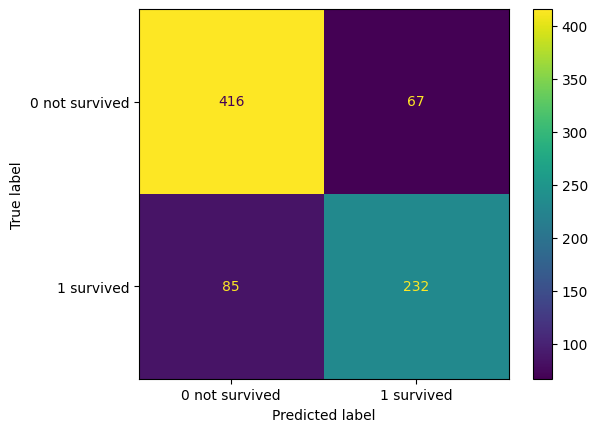

In [27]:
# Training confusion matrix
ConfusionMatrixDisplay(training_cm, display_labels=["0 not survived","1 survived"]).plot()

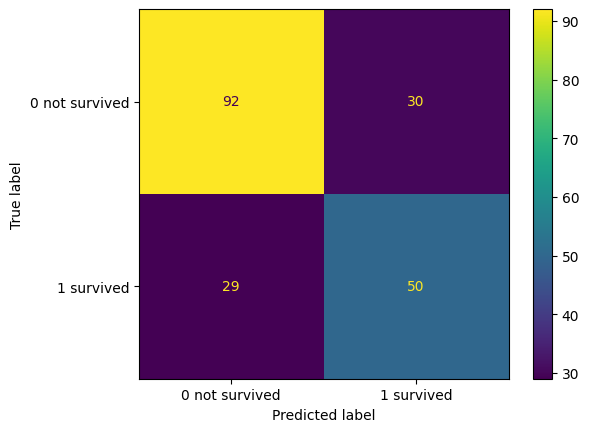

In [28]:
# Testing confusion matrix
ConfusionMatrixDisplay(testing_cm, display_labels=["0 not survived","1 survived"]).plot()

# 7. 模型超參數調參

In [29]:
# 7.1 Split the data (split into 80% training data & 20% testing data) (lock seed) 
scaled_x_train,scaled_x_test,scaled_y_train,scaled_y_test=train_test_split(scaled_x,scaled_y,test_size=0.2,random_state=4)

# 7.2 Manually peforming hyper parameter tuning
model_knn=KNeighborsClassifier(n_neighbors=20, algorithm='brute', metric='minkowski',p=2, n_jobs=-1)
model_knn.fit(scaled_x_train,scaled_y_train)
CV5F_knn_acc=cross_val_score(model_knn,scaled_x_train,scaled_y_train,cv=5,scoring='accuracy')

# 7.3 print reault
print('Training result')
print('Each fold ACC:',CV5F_knn_acc)
print('Average ACC:',round((np.mean(CV5F_knn_acc))*100,2),'+/-',round((np.std(CV5F_knn_acc))*100,2))

Training result
Each fold ACC: [0.7625  0.78125 0.76875 0.7375  0.75625]
Average ACC: 76.12 +/- 1.45


Testing ACC: 73.63
Testing f1s: 64.9
Testing pre: 68.06
Testing sen: 62.03
Testing spe: 81.15

Testing confusion matrix:
[[99 23]
 [30 49]]


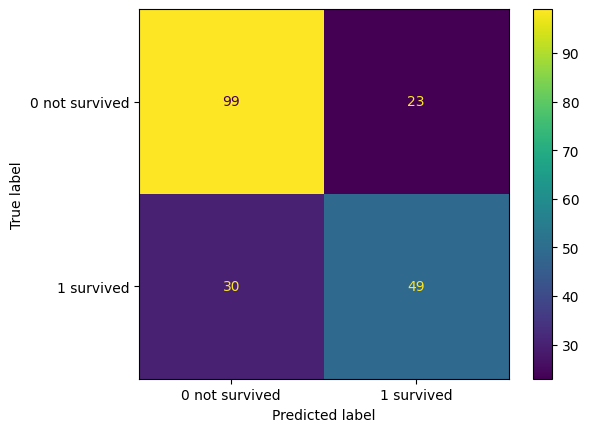

In [33]:
# 7.4 Evaluate with testing data set
final_model_testing_prediction=model_knn.predict(scaled_x_test)
final_model_testing_acc=accuracy_score(scaled_y_test,final_model_testing_prediction)
final_model_testing_f1s=f1_score(scaled_y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_pre=precision_score(scaled_y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_sen=sensitivity_score(scaled_y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_spe=specificity_score(scaled_y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_cm=confusion_matrix(scaled_y_test,final_model_testing_prediction)

# 7.5 print result
print('Testing ACC:',round(final_model_testing_acc*100,2))
print('Testing f1s:',round(final_model_testing_f1s*100,2))
print('Testing pre:',round(final_model_testing_pre*100,2))
print('Testing sen:',round(final_model_testing_sen*100,2))
print('Testing spe:',round(final_model_testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(final_model_testing_cm)

ConfusionMatrixDisplay(final_model_testing_cm, display_labels=["0 not survived","1 survived"]).plot()